**Task 1**

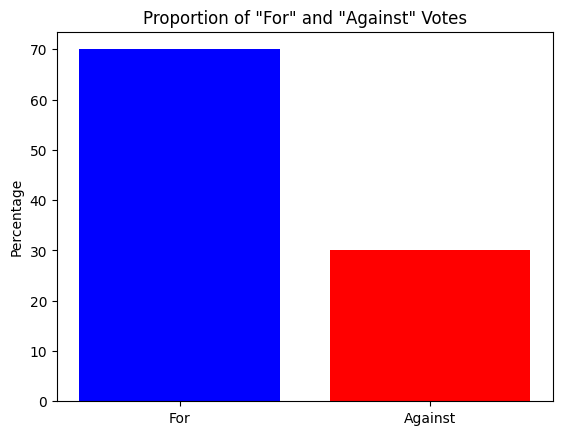

Percentage of "For" votes: 70.0%
Percentage of "Against" votes: 30.000000000000004%
Expectation: 0.7


In [1]:
import matplotlib.pyplot as plt

# Given probabilities
𝜉2 = 0.7

# Calculate proportions
for_proportion = 𝜉2 * 100
against_proportion = (1 - 𝜉2) * 100

# Plot
labels = ['For', 'Against']
proportions = [for_proportion, against_proportion]
colors = ['blue', 'red']

plt.bar(labels, proportions, color=colors)
plt.ylabel('Percentage')
plt.title('Proportion of "For" and "Against" Votes')
plt.show()

print(f'Percentage of "For" votes: {for_proportion}%')
print(f'Percentage of "Against" votes: {against_proportion}%')

# Expectation: E(X) = 𝜉2
expectation = 𝜉2
print(f'Expectation: {expectation}')


**Task 2**

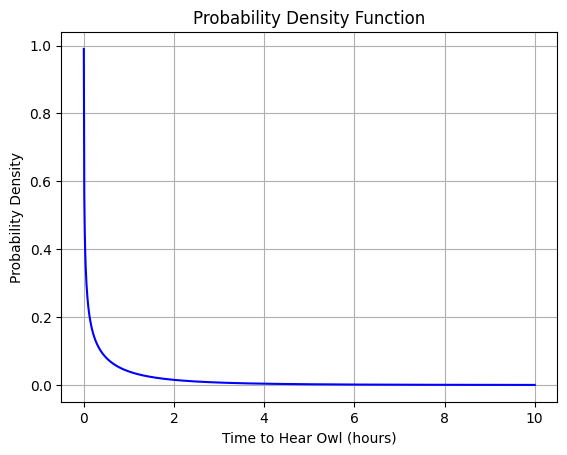

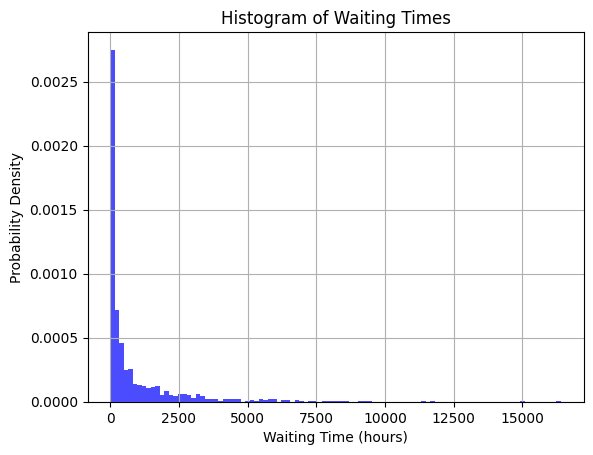

Mean waiting time (hours): 910.3308698316886
Variance of waiting time (hours^2): 2847363.739185779
First quartile (25th percentile) (hours): 43.08138359056491
Median (50th percentile) (hours): 222.75598360473123
Third quartile (75th percentile) (hours): 989.4827076293973


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
ξ4 = 2
ξ5 = 0.58
ξ6 = 9
ξ7 = 0.41
ξ8 = 7

# Define probability density function (PDF)
def pdf_Y(y):
    return ξ5 * np.exp(-ξ6 * np.sqrt(y)) + ξ7 * np.exp(-ξ8 * np.sqrt(y) / 3)

# Generate x values (hours) for PDF graph
x_values = np.linspace(0, 10, 1000)

# Calculate PDF values
pdf_values = pdf_Y(x_values)

# Plot PDF graph
plt.plot(x_values, pdf_values, color='blue')
plt.xlabel('Time to Hear Owl (hours)')
plt.ylabel('Probability Density')
plt.title('Probability Density Function')
plt.grid(True)
plt.show()

# Generate waiting times (in hours)
waiting_times_hours = np.random.exponential(scale=1/pdf_values, size=1000)  # Use size=1000
# Plot histogram by the minute
plt.hist(waiting_times_hours, bins=100, density=True, alpha=0.7, color='blue')
plt.xlabel('Waiting Time (hours)')
plt.ylabel('Probability Density')
plt.title('Histogram of Waiting Times')
plt.grid(True)
plt.show()

# Compute mean, variance, and quartiles
mean = np.mean(waiting_times_hours)
variance = np.var(waiting_times_hours)
quartiles = np.percentile(waiting_times_hours, [25, 50, 75])
print("Mean waiting time (hours):", mean)
print("Variance of waiting time (hours^2):", variance)
print("First quartile (25th percentile) (hours):", quartiles[0])
print("Median (50th percentile) (hours):", quartiles[1])
print("Third quartile (75th percentile) (hours):", quartiles[2])


**Task 3**

In [3]:
import numpy as np
from scipy.optimize import minimize

# Define density function of T for 𝜉9 = 2
def density_T(theta):
    return 1 / theta

# Define likelihood function for 𝜉9 = 2
def likelihood(theta, T):
    return np.prod([density_T(theta) for ti in T])

# Define log-likelihood function for 𝜉9 = 2
def log_likelihood(theta, T):
    return len(T) * np.log(density_T(theta))

# Define negative log-likelihood function for optimization for 𝜉9 = 2
def neg_log_likelihood(theta, T):
    return -log_likelihood(theta, T)

# Estimate model parameter with maximum likelihood for 𝜉9 = 2
def estimate_theta_max_likelihood(T):
    result = minimize(neg_log_likelihood, x0=1, args=(T,), method='Nelder-Mead')
    return result.x[0]

# Compute expectation of bandwidth total to failure of dual-router system for 𝜉9 = 2
def compute_expectation(T):
    return np.mean(T)

# Example usage
T = [10, 20, 30, 40, 50]  # Sample bandwidth totals to failure
theta_hat = estimate_theta_max_likelihood(T)
expectation_T = compute_expectation(T)

print("Estimated model parameter with maximum likelihood:", theta_hat)
print("Expectation of bandwidth total to failure of dual-router system:", expectation_T)

Estimated model parameter with maximum likelihood: 5.329070518200764e-16
Expectation of bandwidth total to failure of dual-router system: 30.0


C:\Users\HP\AppData\Local\Temp\ipykernel_27480\3160054674.py:14: RuntimeWarning: invalid value encountered in log
  return len(T) * np.log(density_T(theta))


**Task 4**

In [4]:
import numpy as np
from scipy.stats import t

# Sample data from the new production system (weights in grams)
𝜉14 = [806, 838, 775, 897, 896, 899, 880, 880, 673, 814]

# Parameters
𝜉11 = 818  # Average weight of hammers in the factory (𝜇)
𝜉12 = 97.1    # Standard deviation of hammers in the factory (𝜎)

# Hypothesis testing
def hypothesis_test(𝜉13, 𝜉14, 𝜉11, 𝜉12, alpha=0.05):
    if 𝜉13 == 0:
        # One-sample t-test for 𝜎
        t_statistic = (np.mean(𝜉14) - 𝜉11) / (np.std(𝜉14, ddof=1) / np.sqrt(len(𝜉14)))
        critical_value = t.ppf(1 - alpha, len(𝜉14) - 1)
        return t_statistic, critical_value, t_statistic < critical_value

# Perform hypothesis test for 𝜉13 = 0 (more constant weights)
𝜉13 = 0
t_statistic, critical_value, reject_null = hypothesis_test(𝜉13, 𝜉14, 𝜉11, 𝜉12)
print("Hypothesis Test Results for 𝜉13 = 0:")
print("Test Statistic:", t_statistic)
print("Critical Value:", critical_value)
print("Reject Null Hypothesis?" if reject_null else "Fail to Reject Null Hypothesis")




Hypothesis Test Results for 𝜉13 = 0:
Test Statistic: 0.7802516005375547
Critical Value: 1.8331129326536333
Reject Null Hypothesis?


**Task 5**

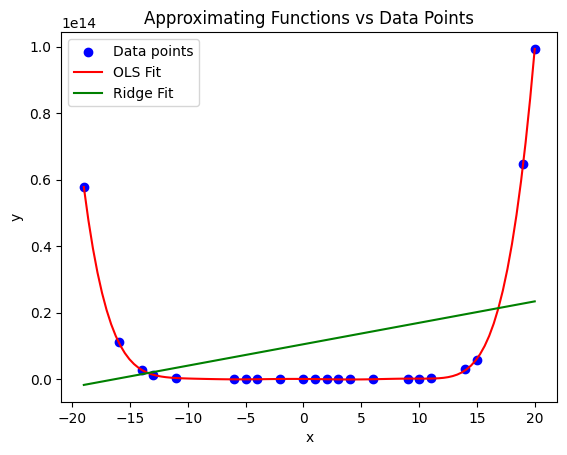

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

# Given sample points
sample_points = [(1, 23.98), (-13, 1368501394178.63), (2, 11826.71), (3, 634758.92),
                 (-19, 57819788390386.85), (0, -1.03), (-11, 250133029980.06),
                 (-5, 91707035.59), (-16, 11169303148934.13), (19, 64826188178560.54),
                 (4, 10857220.87), (6, 657935137.64), (-14, 2863571010174.42),
                 (11, 266890527897.59), (15, 5890311150617.73), (14, 2950615723569.67),
                 (9, 36046122890.91), (10, 105896823821.23), (20, 99323853586909.69),
                 (-4, 9115219.05), (-6, 576425424.62), (-2, 8765.44)]

# Extracting x and y values
x_values = np.array([point[0] for point in sample_points]).reshape(-1, 1)
y_values = np.array([point[1] for point in sample_points])

# Polynomial degree
degree = 10

# Ordinary Least Squares (OLS) estimation
coefficients_ols = np.polyfit(x_values.flatten(), y_values, degree)

# Ridge regularization using sklearn
ridge = Ridge(alpha=0.01)  # Regularization parameter alpha (tune as needed)
ridge.fit(x_values, y_values)
coefficients_ridge = ridge.coef_

# Plotting
x_range = np.linspace(min(x_values), max(x_values), 100)
y_ols = np.polyval(coefficients_ols, x_range)
y_ridge = ridge.predict(x_range.reshape(-1, 1))

plt.scatter(x_values, y_values, color='blue', label='Data points')
plt.plot(x_range, y_ols, color='red', label='OLS Fit')
plt.plot(x_range, y_ridge, color='green', label='Ridge Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Approximating Functions vs Data Points')
plt.legend()
plt.show()
